<a href="https://colab.research.google.com/github/ahihi8z8z/algorithms-and-data-structures-project/blob/main/color-graph-or-tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

6


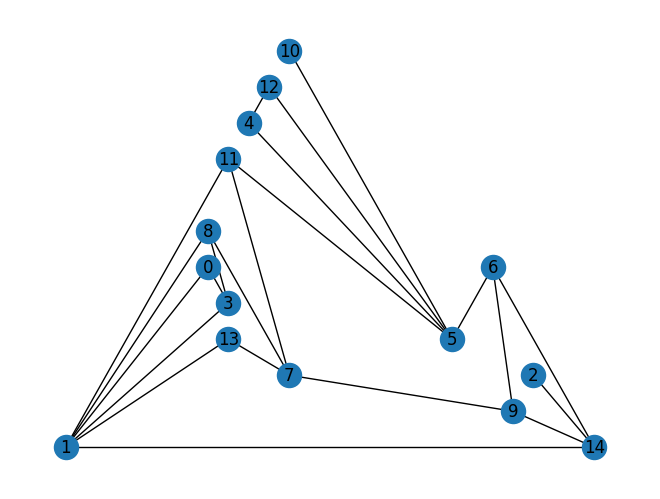

In [203]:
from ortools.sat.python import cp_model
import networkx as nx
from random import randint
import numpy as np
from scipy.spatial import Voronoi,voronoi_plot_2d
import matplotlib.pyplot as plt

max_de = 0
num_node = 0
var = []
color = []
color_pool = []
color_map = []
model = cp_model.CpModel()


#we create a function to generate a planar graph from a voronoi diagram
def voronoi_to_networkx(points):
# we get the voronoi diagram
  vor = Voronoi(points)
  G = nx.Graph()
# Add an edge for each ridge in the Voronoi diagram that connects two points in the range [0,1]
  for simplex in vor.ridge_vertices:
      if -1 not in simplex:
          i, j = simplex
          p = vor.vertices[i]
          q = vor.vertices[j]
          if 0 <= p[0] <= 2 and 0 <= p[1] <= 2 and 0 <= q[0] <= 2 and 0 <= q[1] <= 2:
              G.add_edge(tuple(p), tuple(q))
  map = dict()
  c = 0
  for node in G:
    map[node] = c
    c += 1
  nx.relabel_nodes(G,map,False)
  return G

# Tao random graph
while True:
  # G=voronoi_to_networkx(np.random.rand(50,2))
  G = nx.fast_gnp_random_graph(15,0.3)
  if nx.is_planar(G) == True:
    if nx.is_connected(G) == True:
      break

A = nx.adjacency_matrix(G).todense()
num_node = G.number_of_nodes()
for n in G.degree():
  if max_de < n[1]:
    max_de = n[1]
print(max_de)
nx.draw(G, with_labels=True, pos = nx.planar_layout(G))
# Khoi tao color pool
for i in range(max_de+1):
    color_pool.append('#%06X' % randint(0, 0xFFFFFF))

mininum number of color = 3
mau 0 duoc dung
mau 1 duoc dung
mau 2 duoc dung
mau 3 khong duoc dung
mau 4 khong duoc dung
mau 5 khong duoc dung
mau 6 khong duoc dung


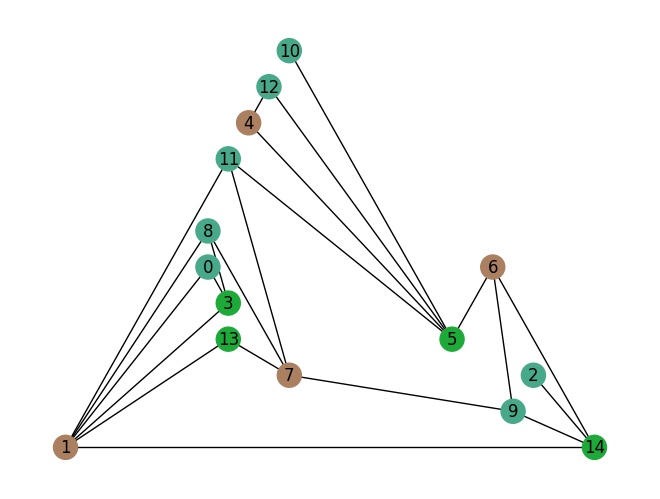

In [204]:

# Khoi tao cac bien
for i in range(num_node):
  var.append([])
  for j in range(max_de+1):
    var[i].append(model.NewBoolVar("x_%s_%s" % (i,j)))

for i in range(max_de+1):
  color.append(model.NewBoolVar("y_%s" % (i)))

min_color = model.NewIntVar(0,max_de+1,"min_color")

# Cac dieu kien
# Tranh truong hop color = 1 nhung tong var = 0
for j in range(max_de+1):
  temp = [row[j] for row in var]
  model.Add(color[j] <= cp_model.LinearExpr.Sum(temp))

# node nao cung duoc to mau
for i in range(num_node):
  model.Add(cp_model.LinearExpr.Sum(var[i]) == 1)

# Cac node lien ke phai khac mau nhau
for node in G:
  for nb in G.neighbors(node):
    for j in range(max_de+1):
      model.Add(var[nb][j] + var[node][j] <= color[j])

# Cac mau phai duoc dung lan luot
for j in range(1,max_de+1):
  model.Add(color[j] <= color[j-1])

# Tim solution dung it mau nhat
model.Add(min_color == cp_model.LinearExpr.Sum(color))
model.Minimize(min_color)

# Creates a solver and solves the model.
solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL :
    print(f"mininum number of color = {solver.Value(min_color)}")
    for j in range(max_de+1):
      if solver.Value(color[j]) == 1:
        print(f"mau {j} duoc dung")
      else:
        print(f"mau {j} khong duoc dung")
    for i in range(num_node):
      for j in range(max_de+1):
        if solver.Value(var[i][j]) == 1:
          # print(f"node {i} mau {j}")
          color_map.append(color_pool[j])
          break
    nx.draw(G,node_color=color_map, with_labels=True, pos = nx.planar_layout(G))
else:
    print("No solution found.")



